### Identifying Trend Stucture with Python

* Hello, we will be going over how to identify trend structure like higher highs/lows and lower lows/highs.
* Trend structure is important in trading financial markets and can help identify entry and exit points along with indication as to whether the trend will continue or stall.
* We will be using scipy, pandas, and numpy.

In [2]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt

In [18]:
# I downloaded 3 months of TSLA Daily data fron yahoo finance
path = ('~/Desktop/TSLA.csv')
df = pd.read_csv(path, parse_dates=True, infer_datetime_format=True)

# Set index as Date and drop the Date column
df = df.set_index('Date', drop=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-19,446.239990,447.000000,428.869995,430.829987,430.829987,36287800
2020-10-20,431.750000,431.750000,419.049988,421.940002,421.940002,31656300
2020-10-21,422.700012,432.950012,421.250000,422.640015,422.640015,32370500
2020-10-22,441.920013,445.230011,424.510010,425.790009,425.790009,39993200
2020-10-23,421.839996,422.890015,407.380005,420.630005,420.630005,33717000
...,...,...,...,...,...,...
2021-01-11,849.400024,854.429993,803.619995,811.190002,811.190002,59554100
2021-01-12,831.000000,868.000000,827.340027,849.440002,849.440002,46270700
2021-01-13,852.760010,860.469971,832.000000,854.409973,854.409973,33312500


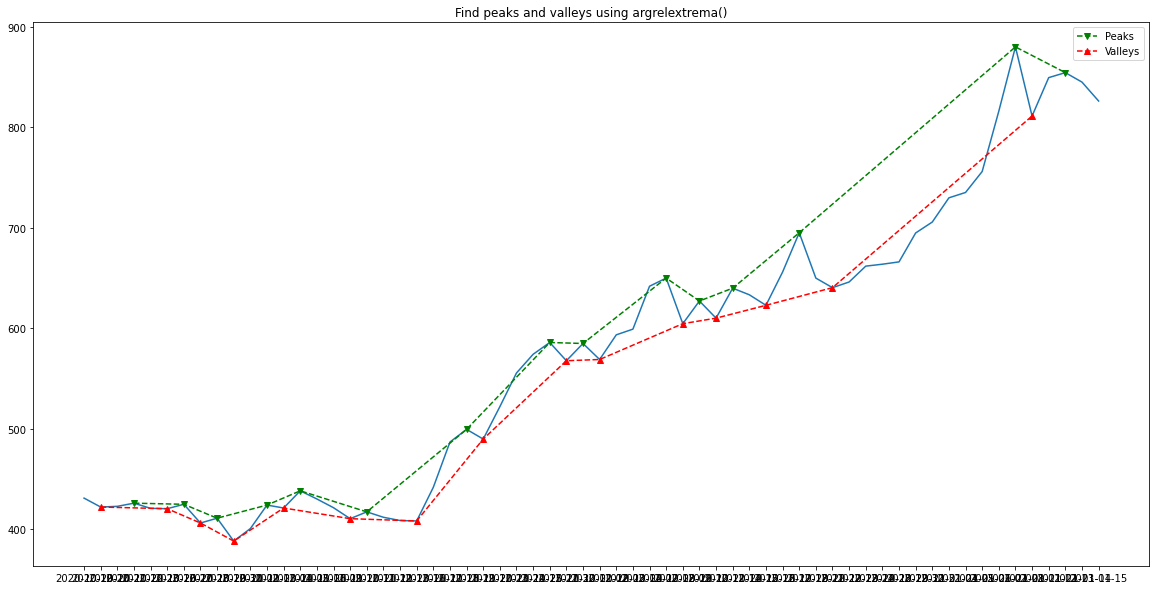

In [19]:
# Define data.
data_x = df['Adj Close']
data_y = df['Adj Close']
 
# Find peaks(max).
peak_indexes = signal.argrelextrema(data_y.to_numpy(), np.greater)
peak_indexes = peak_indexes[0]
 
# Find valleys(min).
valley_indexes = signal.argrelextrema(data_y.to_numpy(), np.less)
valley_indexes = valley_indexes[0]
 
# Plot main graph.
(fig, ax) = plt.subplots(figsize=(20,10))
ax.plot(data_x)
 
# Plot peaks.
peak_x = peak_indexes
peak_y = data_y[peak_indexes]
ax.plot(peak_x, peak_y, marker='v', linestyle='dashed', color='green', label="Peaks")
 
# Plot valleys.
valley_x = valley_indexes
valley_y = data_y[valley_indexes]
ax.plot(valley_x, valley_y, marker='^', linestyle='dashed', color='red', label="Valleys")
 
# Plot title and legend
plt.title('Find peaks and valleys using argrelextrema()')
plt.legend(loc='best')
plt.show()

In [20]:
# Create df of min/max
minmax_df = pd.DataFrame()
minmax_df['Peaks'] = peak_indexes
minmax_df['Valleys'] = valley_indexes
minmax_df

,Peaks,Valleys
0,3,1
1,6,5
2,8,7
3,11,9
4,13,12
5,17,16
6,23,20
7,28,24
8,30,29
9,35,31


* Overall it's pretty simple to  idenfity the highs and lows within the data. 
* This can then be used for entry exit and stop placement. 
* I will update this again as time goes on.